# Conjuntos de datos

PyTorch utiliza modulos personalizados para los conjuntos de datos, utilizando dos objetos clave.
Estos objetos ayudan al usuario a manter el código dividido en datos de enrtenamiento y de test.
Su objetivo es mejorar la legibilidad y la modularidad.

Tenemos dos objetos:
- torch.utils.data.DataLoader
- torch.utils.data.Dataset

### Cargar un conjunto de datos

A continuación se muestra un ejemplo de cómo cargar el conjunto de datos Fashion-MNIST desde TorchVision. Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando que consta de 60.000 ejemplos de entrenamiento y 10.000 ejemplos de prueba. Cada ejemplo consta de una imagen en escala de grises de 28 × 28 y una etiqueta asociada de una de 10 clases.

Cargamos el Dataset FashionMNIST con los siguientes parámetros:
- *root* : es la ruta donde se almacenan los datos del tren/prueba,

- *train* : especifica el conjunto de datos de entrenamiento o prueba,

- *download=True* : descarga los datos de Internet si no están disponibles en root.

- *transform* y *target_transform* : especificar las transformaciones de características y etiquetas

In [5]:
# Cargar librerias
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [6]:
# Cragar conjunto de datos train
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
# Cragar conjunto de datos test
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### Visualizar datos

Podemos indexar *Datasets* manualmente como una lista: *training_data[index]*. Se suele utilziar *matplotlib* visualizar algunas muestras en nuestros datos de entrenamiento.

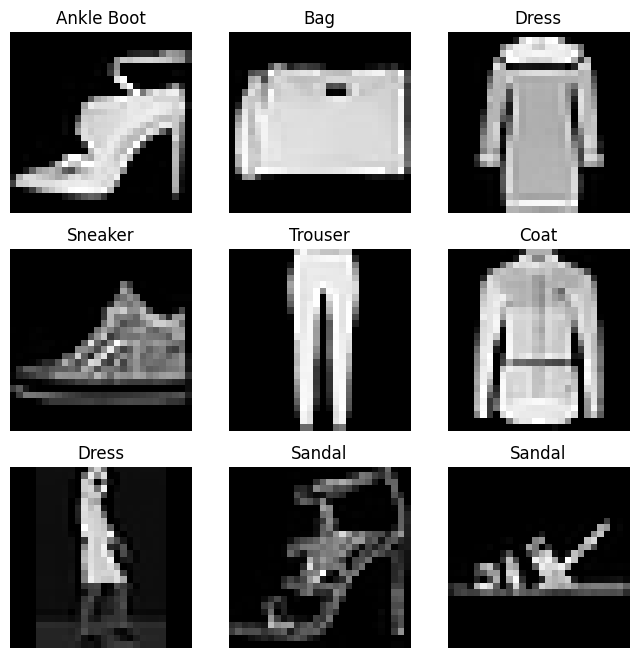

In [7]:
# Crear etiquetas
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
# Crear grafica
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # Seleccionar una muestra
    img, label = training_data[sample_idx] # Acceder a la imagen y la etiqueta
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Crear un conjunto propio

Para poder crear un conjuntos de datos personalizado es necesario crear un clase en python, con 3 funciones:
- *__init__*
- *__len__*
- *__getitem__*

**Para el ejemplo**: Las imágenes FashionMNIST se almacenan en un directorio img_diry sus etiquetas se almacenan por separado en un archivo CSV annotations_file

##### Ejemplo completo

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file) # Cargar etiquetas
        self.img_dir = img_dir # Cargar directorio
        self.transform = transform # Transformaciones
        self.target_transform = target_transform # Transformaciones etiqueta

    def __len__(self):
        return len(self.img_labels) # Cantidad de imagenes

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0]) # Cargar imagen
        image = read_image(img_path) # Cargar imagen
        label = self.img_labels.iloc[idx, 1] # Cargar etiqueta
        if self.transform:
            image = self.transform(image) # Transformar imagen
        if self.target_transform:
            label = self.target_transform(label) # Transformar etiqueta
        return image, label

##### Función __init __

La función __init __ se ejecuta una vez al crear una instancia del objeto Dataset. Inicializamos el directorio que contiene las imágenes, el archivo de anotaciones y ambas transformaciones

In [ ]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file) # Cargar etiquetas
    self.img_dir = img_dir # Cargar directorio
    self.transform = transform # Transformaciones
    self.target_transform = target_transform # Transformaciones

##### Función __len __

La función __len __ devuelve el número de muestras en nuestro conjunto de datos.

In [ ]:
def __len__(self):
    return len(self.img_labels) # Cantidad de imagenes

##### Función __getitem __

La función __getitem __ carga y devuelve una muestra del conjunto de datos en el índice dado idx. Según el índice, identifica la ubicación de la imagen en el disco, la convierte en un tensor usando read_image, recupera la etiqueta correspondiente de los datos csv en self.img_labels, llama a las funciones de transformación en ellos (si corresponde) y devuelve la imagen del tensor y la etiqueta correspondiente en una tupla.

In [ ]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0]) # Cargar imagen
    image = read_image(img_path) # Cargar imagen
    label = self.img_labels.iloc[idx, 1] # Cargar etiqueta
    if self.transform:
        image = self.transform(image) # Transformar imagen
    if self.target_transform:
        label = self.target_transform(label) # Transformar etiqueta
    return image, label

### Preparar datos para entrenar

DataLoaderes un iterable que nos abstrae esta complejidad en una API sencilla.
Mientras entrenamos un modelo, normalmente queremos pasar muestras en "minilotes", reorganizar los datos en cada época para reducir el sobreajuste del modelo y usar Python multiprocessingpara acelerar la recuperación de datos.


In [8]:
from torch.utils.data import DataLoader # Cargar DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True) # Cargar DataLoader de train
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True) # Cargar DataLoader de test

##### Iterar un DataLoader

Hemos cargado ese conjunto de datos en *DataLoader* y podemos iterar a través del conjunto de datos según sea necesario. Cada iteración siguiente devuelve un lote de *train_features* y *train_labels* (que contiene *batch_size=64* características y etiquetas respectivamente). Debido a que especificamos shuffle=True, después de iterar sobre todos los lotes, los datos se mezclan

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


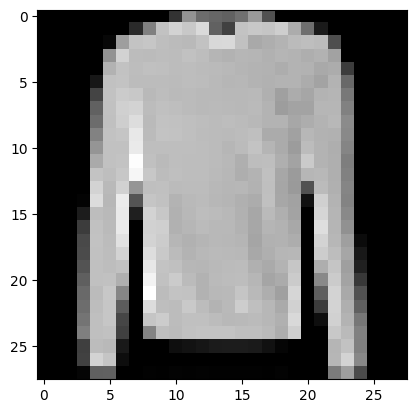

Label: 2


In [16]:
# Cargar primeras imagenes
train_features, train_labels = next(iter(train_dataloader)) # Cargar imagenes
print(f"Feature batch shape: {train_features.size()}") # Imprimir lote de imagen
print(f"Labels batch shape: {train_labels.size()}") # Imprimir lote de etiquetas
img = train_features[0].squeeze() # Obtener imagen 0 del lote
label = train_labels[0] # Obtener etiqueta 0 del lote
plt.imshow(img, cmap="gray") # Mostrar imagen
plt.show()
print(f"Label: {label}") # Mostrar etiqueta